# <center>Machine Learning Project</center><hr>

# <center>Classifying Song Genres from Audio Data</center><hr>

# <b>Group Members:
- <b>Abdullah Afzal (BCSF20M501)
- <b>Hafiz Nouman Yousaf (BCSF19M521)
- <b>Daniyal Faysal (BCSF20M507)
    
<hr>

### Introduction
In this project, our goal is to classify songs as either <b>'Hip-Hop' or 'Rock'</b> on the basis of multiple properries of music.<hr>

### Dataset Overview
We will be working with following two datasets compiled by <b>The Echo Nest:</b><br>
<b>CSV Dataset:</b> Contains metadata information about songs, including title, artist, and number of listens.
<br><b>JSON Dataset:</b> Includes musical features such as danceability and acousticness on a scale from -1 to 1.<hr>
                            
# Approach towards Problem

### Data Preparation 
To proceed with the classification task, we will utilize the pandas library to create two separate DataFrames from the CSV and JSON files. These DataFrames will allow us to organize and manipulate the data effectively. We will then merge the DataFrames to create a merged dataset that combines both the features and labels (Hip-Hop or Rock) for classification.<hr>

### Normalizing the feature data
To simplify our models and reduce the number of features, we can use <b>Principal Component Analysis (PCA)</b> to identify the most influential features. </br>But before applying PCA, we normalize the features through standardization to ensure they have a mean of 0 and a standard deviation of 1.<hr>

### Classification Algorithms
Our merged dataset will serve as the input for training and evaluating machine learning algorithms. We will focus on two commonly used algorithms:

<b>Decision Trees:</b> These algorithms create a model that predicts the class label based on the values of input features. They make decisions by splitting the dataset based on feature values.
<br><b>Logistic Regression:</b> A widely used algorithm for binary classification, logistic regression models the relationship between the features and the probability of belonging to a particular class.<hr>

### Conclusion so far
By leveraging the merged dataset and employing decision trees and logistic regression, we aim to classify songs  as Hip-Hop or Rock based on their metadata and musical features with almost accuracy of <b>87%</b>.<hr> 

### Work to be done After D2
</br>However, looking at our classification report, we can see that rock songs are fairly well classified, but hip-hop songs are disproportionately misclassified as rock songs. The concern is we have far more data points for the rock classification than for hip-hop, potentially skewing our model's ability to distinguish between classes. To tackle this problem we will do balancing of our data <hr>



# Data Loading and Merging

In [6]:
import pandas as pd

# Reading the CSV file containing track metadata, including genre labels
tracks = pd.read_csv("datasets/fma-rock-vs-hiphop.csv")

# Reading the JSON file containing track metrics with features
echonest_metrics = pd.read_json("datasets/echonest-metrics.json")

# Combining the relevant columns from track metadata and track metrics
echo_tracks = echonest_metrics.merge(tracks[["track_id", "genre_top"]], on="track_id")

# Displaying information about the resulting dataframe
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


## Correlation Matrix Analysis
<p>We typically want to avoid using variables that have strong correlations with each other.<br>
Strong correlations between features should be avoided for simplicity, interpretability, and prevention of overfitting.</p>

Examining correlation coefficients helps us understand the relationship between features:

- Correlation coefficients range from -1 to 1.
- value close to -1 indicates a strong negative correlation.
- value close to 1 indicates a strong positive correlation.
- value close to 0 indicates a weak or no correlation.

In [7]:
# Creating correlation matrix
corr_metrics = echo_tracks.corr()
corr_metrics.style.background_gradient()


,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


## Train-Test Split for Classification
Since we didn't find any particularly strong correlations between our features, we split our data into training and testing sets using the train_test_split function from scikit-learn. The features and labels are assigned to separate arrays, and the data is divided with a specified test size and random state.

In [8]:
from sklearn.model_selection import train_test_split

# Creating the feature matrix
features = echo_tracks.drop(["genre_top" ,"track_id" ] , axis = 1)

# Creating labels
labels = echo_tracks[["genre_top"]]

# Splitting the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features,labels,test_size=0.2,random_state=10)

## Normalizing the feature data
<p>We want to reduce the number of features and will will apply PCA for this but it's essential to normalize the features before applying PCA to avoid bias caused by features with broader value ranges. 
<br>Hence we will use <b>Standardization</b>, a common method for normalization, which converts features to have a mean of 0 and standard deviation of 1 (z-score)</p>

In [9]:
from sklearn.preprocessing  import StandardScaler

# Scale the features and set the values to a new variable
scaler = StandardScaler()

# Scale train_features and test_features
scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.transform(test_features)

## Principal Component Analysis on our scaled data
<p>Now that we have preprocessed our data, we are ready to use PCA to determine by how much we can reduce the dimensionality of our data. We can use visualizations like <b>scree-plots</b> and <b>cumulative explained ratio plots</b> to find the number of components to use in further analyses.</p>
<br><p>We are using <b>scree-plots</b> visualization here</p>


Text(0.5, 0, 'Principal Component #')

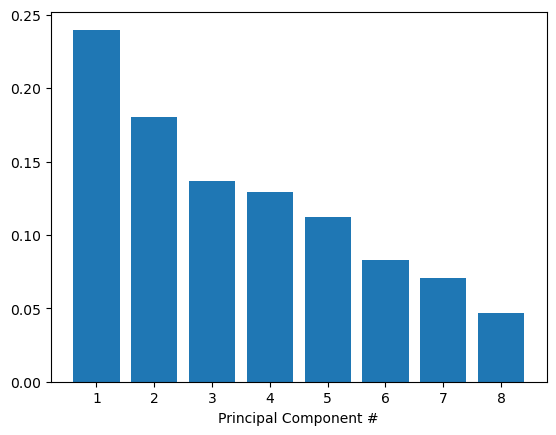

In [24]:
# This is just to make plots appear in the notebook
%matplotlib inline

# Import our plotting module, and PCA class
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_

# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(1, len(exp_variance) + 1), exp_variance)
ax.set_xlabel('Principal Component #')

## Further visualization of PCA 
<p>From the above graph we can clearly see that there does not appear to be a clear elbow in this scree plot, which means it is not straightforward to find the number of intrinsic dimensions using this method. </p>
<p>Now we will use <b>cumulative explained variance plot</b> to determine how many features are required to explain, say, about 85% of the variance.<br>Once we determine the appropriate number of components, we can perform PCA with that many components, ideally reducing the dimensionality of our data.</p>

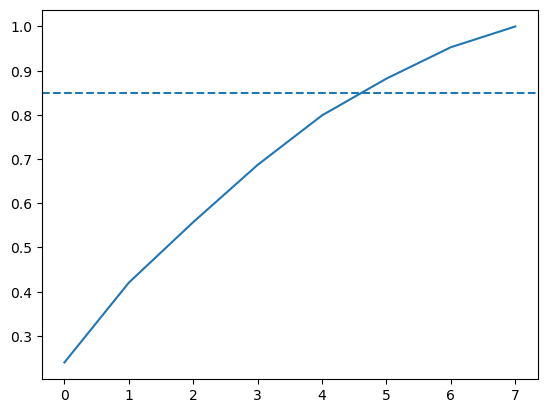

In [16]:
import numpy as np

# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')

## Projecting on to our features
<p>We saw from the plot that 6 features (remember indexing starts at 0) can explain 85% of the variance! </p>
<p>Therefore, we can use 6 components to perform PCA and reduce the dimensionality of our train and test features.</p>

In [17]:
# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components = 6 , random_state = 10)

# Fit and transform the scaled training features using pca
train_pca = pca.fit_transform(scaled_train_features)

# Fit and transform the scaled test features using pca
test_pca = pca.transform(scaled_test_features)

## Train a decision tree to classify genre
<p>Now we can use the lower dimensional PCA projection of the data to classify songs into genres.Here, we will be using a simple algorithm known as a <b>decision tree</b>. Decision trees are rule-based classifiers that take in features and follow a 'tree structure' of binary decisions to ultimately classify a data point into one of two or more categories.</p>

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Train our decision tree
tree = DecisionTreeClassifier(random_state = 10)
tree.fit(train_pca , train_labels)

# Predict the labels for the test data
pred_labels_tree = tree.predict(test_pca)

## Compare our decision tree to a logistic regression
<p>Our tree model's performance is decent, but we will try another model to check how better other model can perform on this data </p>
<p>We will apply <b>logistic regression</b> on the data. As Logistic Regression is a simple model and sometimes simple models do better job than the complex ones. Once we have results from both models, we can compare them on a few performance metrics, such as false positive and false negative rate. </p>

In [19]:
from sklearn.linear_model import LogisticRegression

# Train our logistic regression and predict labels for the test set
logreg = LogisticRegression(random_state = 10)
logreg.fit(train_pca , train_labels.values.ravel())
pred_labels_logit = logreg.predict(test_pca)

# Create the classification report for both models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels,pred_labels_tree)
class_rep_log = classification_report(test_labels,pred_labels_logit)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.65      0.65      0.65       188
        Rock       0.91      0.91      0.91       773

    accuracy                           0.86       961
   macro avg       0.78      0.78      0.78       961
weighted avg       0.86      0.86      0.86       961

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.79      0.55      0.65       188
        Rock       0.90      0.97      0.93       773

    accuracy                           0.88       961
   macro avg       0.85      0.76      0.79       961
weighted avg       0.88      0.88      0.87       961



# What to do further

<p>Both our models do similarly well, boasting an average accuracy of <b>87%</b> each, however, looking at our classification report, we can see that rock songs are fairly well classified, but hip-hop songs are disproportionately misclassified as rock songs. The concern is we have far more data points for the rock classification than for hip-hop, potentially skewing our model's ability to distinguish between classes. To tackle this problem we will do balancing of our data.</p>